### Dependencies
* pip install spacy, pandas, matplotlib, pathlib
* python -m spacy.en.download

In [1]:
#import sys
#sys.path.append('/home/jupyter/site-packages/')
from IPython.display import SVG, display
import spacy
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [2]:
nlp = spacy.load('en')

### Accessing Tokens and Spans

In [4]:
import pandas as pd
def info(obj):
    return {'type':type(obj),'__str__': str(obj)}


text = u"""spaCy excels at large-scale information extraction tasks. 
It's written from the ground up in carefully memory-managed Cython. """
document = nlp(text)
token = document[0]
span = document[0:3]


pd.DataFrame(list(map(info, [token, span, document])))

,__str__,type
0,spaCy,<class 'spacy.tokens.token.Token'>
1,spaCy excels at,<class 'spacy.tokens.span.Span'>
2,spaCy excels at large-scale information extrac...,<class 'spacy.tokens.doc.Doc'>


### Sentence boundary detection

In [5]:
print(document.sents)
for sent in document.sents:
    print(sent)

spaCy excels at large-scale information extraction tasks. 

It's written from the ground up in carefully memory-managed Cython.


### Tokenization

In [8]:
for i, token in enumerate(document):
    print('%3d: "%s"' % (i, token))

  0: "spaCy"
  1: "excels"
  2: "at"
  3: "large"
  4: "-"
  5: "scale"
  6: "information"
  7: "extraction"
  8: "tasks"
  9: "."
 10: "
"
 11: "It"
 12: "'s"
 13: "written"
 14: "from"
 15: "the"
 16: "ground"
 17: "up"
 18: "in"
 19: "carefully"
 20: "memory"
 21: "-"
 22: "managed"
 23: "Cython"
 24: "."


In [9]:
### Morphological decomposition

In [12]:
token = document[13]
print("text: %s" % token.text)
print("suffix: %s" % token.suffix_) 
print("lemma: %s" % token.lemma_)

text: written
suffix: ten
lemma: write


In [13]:
### Part of Speech Tagging

In [16]:
#Part of speech and Dependency tagging
attrs = map(lambda token: {
                     "token": token,
                     "part of speech": token.pos_,
                     "Dependency": token.dep_},
                     document)
pd.DataFrame(list(attrs))

,Dependency,part of speech,token
0,nsubj,NOUN,spaCy
1,ROOT,VERB,excels
2,prep,ADP,at
3,amod,ADJ,large
4,punct,PUNCT,-
5,compound,NOUN,scale
6,compound,NOUN,information
7,compound,NOUN,extraction
8,pobj,NOUN,tasks
9,punct,PUNCT,.


In [17]:
### Noun Chunking

In [20]:
print("noun chunks: %s" % list(document.noun_chunks))

noun chunks: [spaCy, large-scale information extraction tasks, It, the ground]


In [ ]:
### Named Entity Recognition

In [21]:
ents = [(ent, ent.root.ent_type_) for ent in document.ents]
print("entities: %s" % ents)

entities: [(Cython, 'ORG')]


In [ ]:
### Text Similarity (Using Word Vectors)

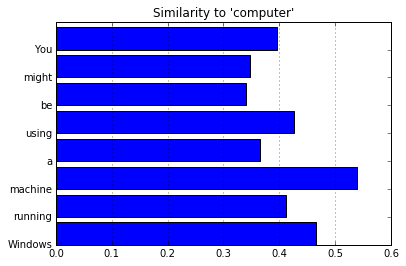

In [30]:
#document, span, and token similarity
def plot_similarities(doc, similarities, target):
    import matplotlib.pyplot as plt
    %matplotlib inline
    f, ax = plt.subplots(1)
    index = range(len(similarities))
    ax.barh(index, similarities)
    ax.set_yticks(index)
    ax.set_yticklabels(doc)
    ax.grid(axis='x')
    ax.set_title("Similarity to '{}'".format(target))
    plt.show()
    
computer = nlp(u'computer')
document2 = nlp(u'You might be using a machine running Windows')
similarities = list(map(lambda token: token.similarity(computer), document2))
document2_r = list(reversed(document2))
similarities_r = list(reversed(similarities))
plot_similarities(document2_r, similarities_r, computer)